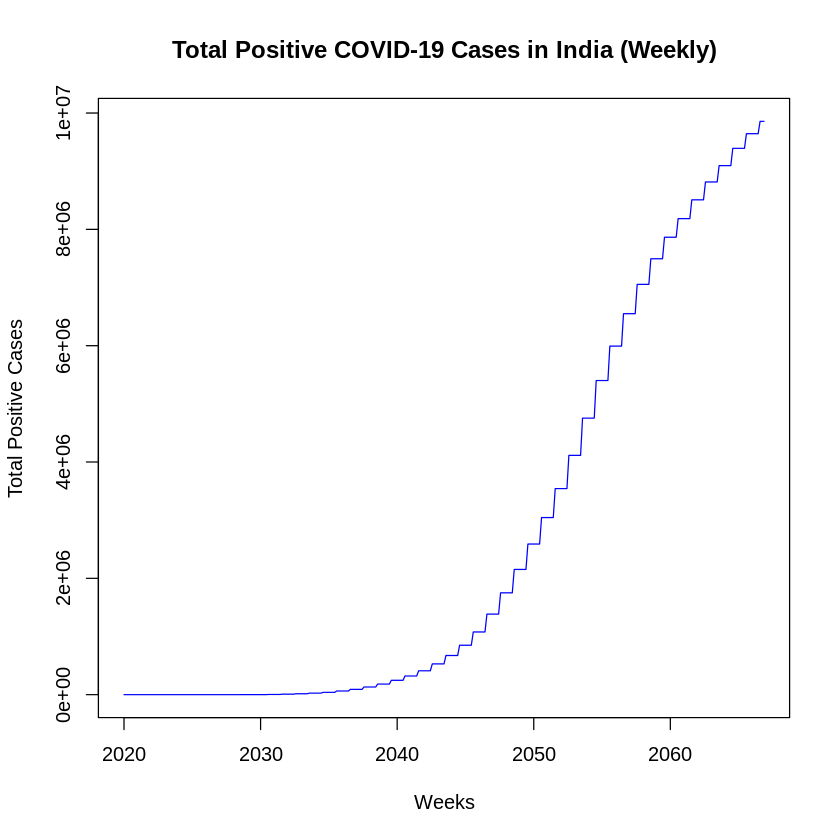

Warning message in auto.arima(positive_cases_ts):
“Having 3 or more differencing operations is not recommended. Please consider reducing the total number of differences.”


Series: positive_cases_ts 
ARIMA(5,2,0)(1,1,2)[7] 

Coefficients:
          ar1      ar2      ar3      ar4      ar5    sar1    sma1     sma2
      -0.8379  -0.6754  -0.5064  -0.3374  -0.1685  0.8170  0.2683  -0.4054
s.e.   0.0552   0.0702   0.0750   0.0703   0.0555  0.0497  0.0749   0.0717

sigma^2 = 68602091:  log likelihood = -3346.29
AIC=6710.58   AICc=6711.16   BIC=6744.49

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE       MASE
Training set 53.81066 8065.811 3682.585 0.01280941 3.658425 0.01740026
                  ACF1
Training set -0.017125

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2067.000        9861459  9850844  9872074  9845225  9877693
2067.143        9866606  9850333  9882879  9841718  9891494
2067.286        9872587  9850898  9894277  9839416  9905758
2067.429        9879559  9852162  9906955  9837660  9921458
2067.571       10097230 10063582 10130879 10045769 10148692


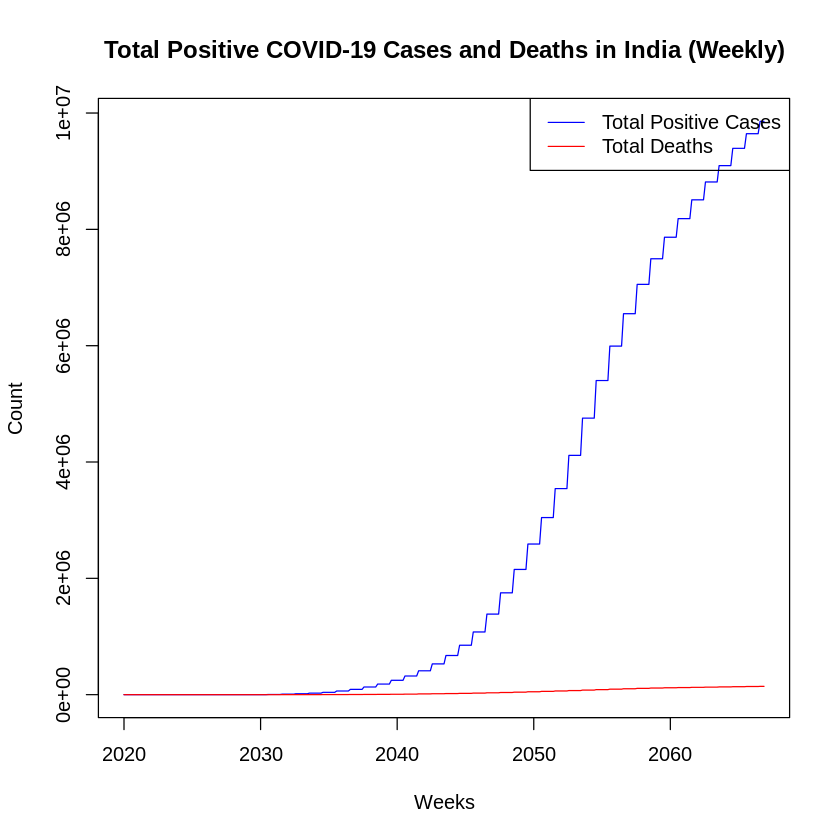

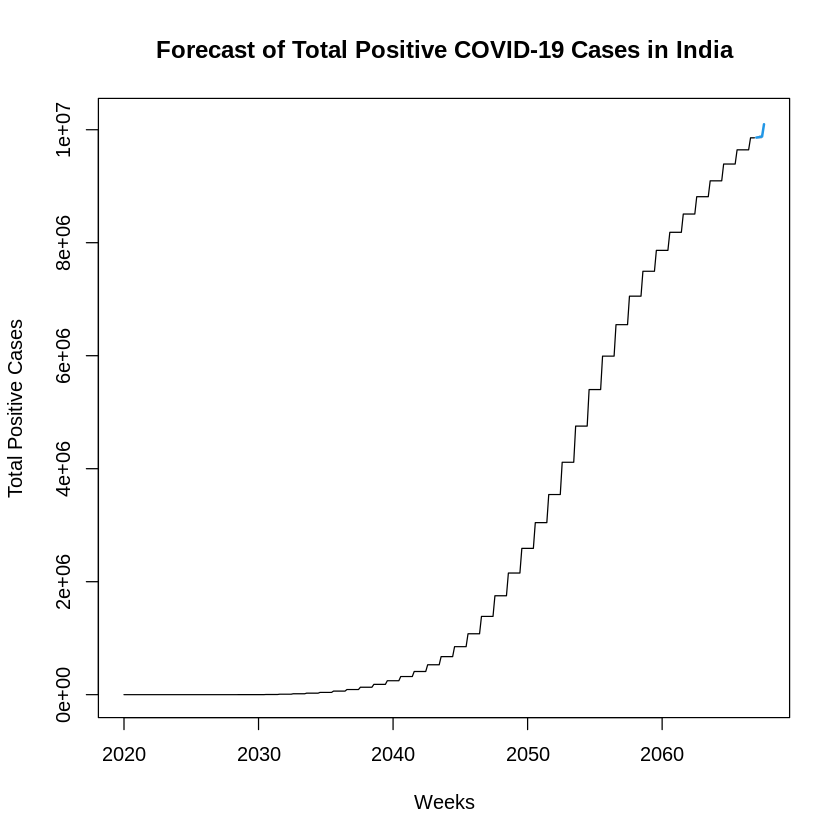

In [8]:
# Load necessary libraries
library(dplyr)
library(forecast)

# Load the data (assuming `covid_data` has been loaded already)
# Convert the 'date' column to Date type
covid_data$date <- as.Date(covid_data$date)

# Filter the data for India and the specific date range
india_data <- covid_data %>%
  filter(location == "India" & date >= as.Date("2020-01-22") & date <= as.Date("2020-12-15"))

# Extract the total positive cases and total deaths columns
positive_cases <- india_data$total_cases
total_deaths <- india_data$total_deaths

# Create a time series object for total positive cases (weekly frequency)
positive_cases_ts <- ts(positive_cases, start = c(2020, 1), frequency = 7)

# Plot the time series for positive cases
plot(positive_cases_ts, type = "l", col = "blue",
     main = "Total Positive COVID-19 Cases in India (Weekly)",
     xlab = "Weeks", ylab = "Total Positive Cases")

# Create a multivariate time series with both positive cases and deaths
covid_multivariate_ts <- ts(cbind(positive_cases, total_deaths), start = c(2020, 1), frequency = 7)

# Plot both series on a single chart
plot(covid_multivariate_ts, plot.type = "single", col = c("blue", "red"),
     main = "Total Positive COVID-19 Cases and Deaths in India (Weekly)",
     xlab = "Weeks", ylab = "Count")
legend("topright", legend = c("Total Positive Cases", "Total Deaths"), col = c("blue", "red"), lty = 1)

# Fit an ARIMA model to the total positive cases
arima_model <- auto.arima(positive_cases_ts)
summary(arima_model)

# Forecast the next 5 weeks
forecast_cases <- forecast(arima_model, h = 5)
print(forecast_cases)

# Plot the forecast
plot(forecast_cases, main = "Forecast of Total Positive COVID-19 Cases in India",
     xlab = "Weeks", ylab = "Total Positive Cases")
